In [1]:
!ls

9d34462453e311ea.zip  sample_data


In [0]:
!unzip 9d34462453e311ea.zip

# Importing Libraries

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense ,BatchNormalization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading data

In [0]:
train_csv_path = 'dataset/train.csv'
test_csv_path = 'dataset/test.csv'

In [0]:
train = pd.read_csv(train_csv_path)
test = pd.read_csv(test_csv_path)

In [6]:
train.Class.value_counts()

Food                    2278
Attire                  1691
misc                    1271
Decorationandsignage     743
Name: Class, dtype: int64

In [7]:
labels = list(train.Class.unique())
labelencoder = LabelEncoder()
train.iloc[:,1] = labelencoder.fit_transform(train.iloc[:,1])
train['Class'] = train.Class.astype(str).str.get_dummies().values.tolist()
train.head()

,Image,Class
0,image7042.jpg,"[0, 0, 1, 0]"
1,image3327.jpg,"[0, 0, 0, 1]"
2,image10335.jpg,"[1, 0, 0, 0]"
3,image8019.jpg,"[0, 0, 1, 0]"
4,image2128.jpg,"[1, 0, 0, 0]"


In [0]:
def load_train_data(IMG_SIZE):
  train_img_path='dataset/Train Images'
  j = 0
  train_img=[]
  train_label=[]
  for i in tqdm(train['Image']):
      final_path=os.path.join(train_img_path,i)
      img=cv2.imread(final_path)
      img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
      train_img.append(img)
      train_label.append(train['Class'][j])
      j+=1
  return np.array(train_img),np.array(train_label)

In [0]:
def load_test_data(IMG_SIZE):
  test_img_path='dataset/Test Images'
  test_img=[]
  for i in tqdm(test['Image']):
      final_path=os.path.join(test_img_path,i)
      img=cv2.imread(final_path)
      img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
      test_img.append(img)
  return np.array(test_img)

In [10]:
train_images , train_labels = load_train_data(224)

100%|██████████| 5983/5983 [00:02<00:00, 2447.39it/s]


In [11]:
test_images = load_test_data(224)

100%|██████████| 3219/3219 [00:00<00:00, 3510.50it/s]


# A look at the images

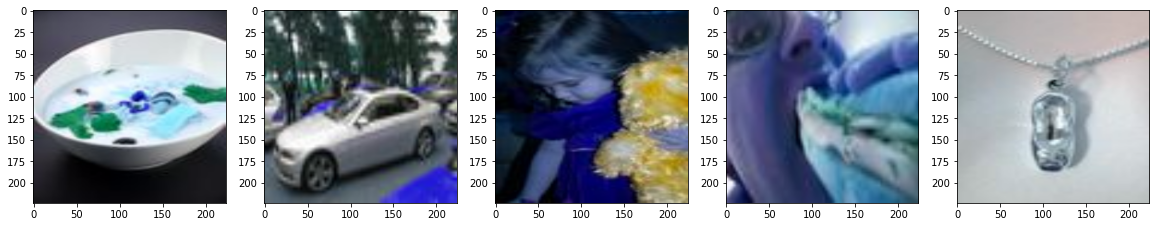

In [12]:
plt.figure(figsize = (20,10))
columns = 5
for i in range(columns):
  plt.subplot(columns/columns +1, columns,i+1)
  plt.imshow(np.array(train_images[i]))


(224, 224, 3)


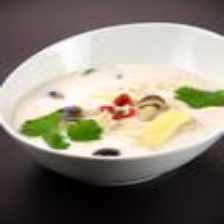

In [13]:
print(np.shape(train_images[0]))
cv2_imshow(train_images[0])

(224, 224, 3)


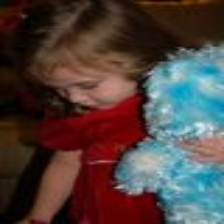

In [14]:
print(np.shape(train_images[3]))
cv2_imshow(train_images[2])

# Simple CNN Model

In [0]:
def gala_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(64,(3,3),activation = 'relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128,(3,3),activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(128,activation = 'relu'))
  model.add(Dense(4,activation = 'softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
  return model

In [0]:
sns.set()

def make_plots(history,epochs = 10):

  fig , ax = plt.subplots(1,2,figsize = (15,5))

  # summarize history for accuracy

  sns.lineplot(x = list(range(1,epochs+1)) , y = history.history['accuracy'],ax = ax[0])
  sns.lineplot(x = list(range(1,epochs+1)) , y = history.history['val_accuracy'], ax = ax[0])
  ax[0].set_title('model accuracy')
  ax[0].set_ylabel('accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].legend(['train', 'test'])

  # summarize history for loss

  sns.lineplot(x = list(range(1,epochs+1)) , y = history.history['loss'],ax = ax[1])
  sns.lineplot(x = list(range(1,epochs+1)) , y = history.history['val_loss'], ax= ax[1])
  ax[1].set_title('model loss')
  ax[1].set_ylabel('loss')
  ax[1].set_xlabel('epoch')
  ax[1].legend(['train', 'test'])


Epoch 1/15
85/85 [==============================] - 16s 193ms/step - loss: 108.6558 - accuracy: 0.3588 - val_loss: 5.6599 - val_accuracy: 0.2905
Epoch 2/15
85/85 [==============================] - 16s 187ms/step - loss: 1.5459 - accuracy: 0.4669 - val_loss: 3.9314 - val_accuracy: 0.4307
Epoch 3/15
85/85 [==============================] - 16s 187ms/step - loss: 1.2439 - accuracy: 0.5293 - val_loss: 3.9378 - val_accuracy: 0.4457
Epoch 4/15
85/85 [==============================] - 16s 187ms/step - loss: 1.0933 - accuracy: 0.5773 - val_loss: 3.9268 - val_accuracy: 0.4508
Epoch 5/15
85/85 [==============================] - 16s 187ms/step - loss: 0.9729 - accuracy: 0.6213 - val_loss: 5.4692 - val_accuracy: 0.4324
Epoch 6/15
85/85 [==============================] - 16s 187ms/step - loss: 0.9201 - accuracy: 0.6348 - val_loss: 4.2767 - val_accuracy: 0.4441
Epoch 7/15
85/85 [==============================] - 16s 187ms/step - loss: 0.8218 - accuracy: 0.6718 - val_loss: 3.9112 - val_accuracy: 0.44

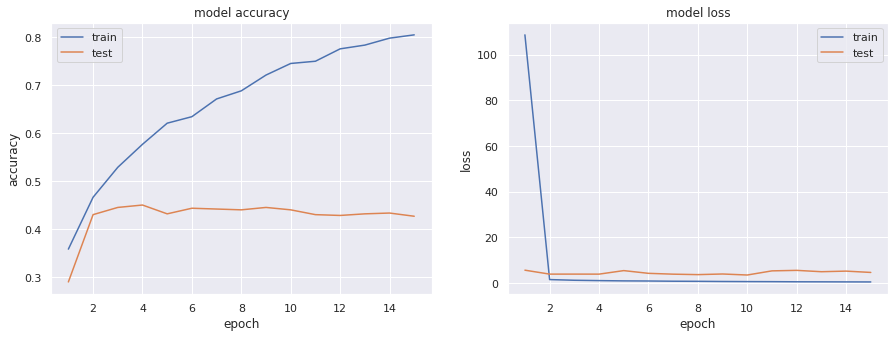

In [17]:
model = gala_model()
epochs = 15
history = model.fit(train_images, train_labels ,batch_size=64, epochs=epochs, validation_split=0.1)

make_plots(history , epochs)

# CNN with BatchNorm 

In [0]:
def gala_model2():
  model = Sequential()
  model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224, 224, 3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  #model.add(Dropout(0.3))
  model.add(Dense(4, activation = 'softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
model = gala_model2()

Epoch 1/15
85/85 [==============================] - 12s 144ms/step - loss: 0.5553 - accuracy: 0.7860 - val_loss: 1.1762 - val_accuracy: 0.5559
Epoch 2/15
85/85 [==============================] - 12s 144ms/step - loss: 0.5338 - accuracy: 0.7877 - val_loss: 1.2320 - val_accuracy: 0.5459
Epoch 3/15
85/85 [==============================] - 12s 144ms/step - loss: 0.4663 - accuracy: 0.8223 - val_loss: 1.2974 - val_accuracy: 0.5442
Epoch 4/15
85/85 [==============================] - 12s 143ms/step - loss: 0.4114 - accuracy: 0.8429 - val_loss: 1.3303 - val_accuracy: 0.5776
Epoch 5/15
85/85 [==============================] - 12s 144ms/step - loss: 0.3967 - accuracy: 0.8572 - val_loss: 1.2644 - val_accuracy: 0.5776
Epoch 6/15
85/85 [==============================] - 12s 144ms/step - loss: 0.3898 - accuracy: 0.8548 - val_loss: 1.3433 - val_accuracy: 0.5576
Epoch 7/15
85/85 [==============================] - 12s 144ms/step - loss: 0.3141 - accuracy: 0.8863 - val_loss: 1.4756 - val_accuracy: 0.5476

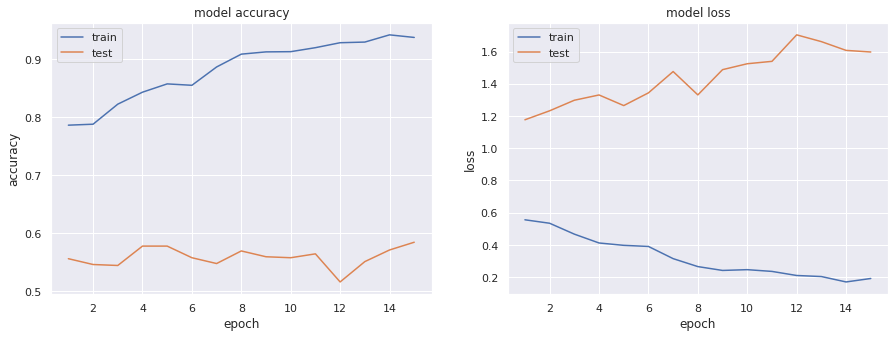

In [21]:
epochs = 15
gala_model2_history = model.fit(train_images,train_labels,batch_size = 64,epochs = epochs, verbose = 1, validation_split = 0.1)

make_plots(gala_model2_history,epochs = epochs)

# VGG19 Network

In [22]:
from keras.applications import VGG19
from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau

vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (224, 224, 3),pooling='avg')
vgg19.trainable = False

model = Sequential([
  vgg19, 
  Dense(1024, activation='relu'),
  Dropout(0.5),
  Dense(256, activation='relu'),
  Dense(4, activation='softmax'),
])

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',factor=0.1,patience=2,cooldown=2,min_lr=0.00001,verbose=1)

callbacks = [reduce_learning_rate]

model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Using TensorFlow backend.


80142336/80134624 [==============================] - 3s 0us/step


Train on 5384 samples, validate on 599 samples
Epoch 1/20
5384/5384 [==============================] - 45s 8ms/step - loss: 1.2198 - accuracy: 0.6291 - val_loss: 0.6901 - val_accuracy: 0.7429
Epoch 2/20
5384/5384 [==============================] - 41s 8ms/step - loss: 0.6772 - accuracy: 0.7452 - val_loss: 0.7056 - val_accuracy: 0.7295
Epoch 3/20
5384/5384 [==============================] - 41s 8ms/step - loss: 0.5805 - accuracy: 0.7821 - val_loss: 0.5735 - val_accuracy: 0.7846
Epoch 4/20
5384/5384 [==============================] - 42s 8ms/step - loss: 0.5050 - accuracy: 0.8024 - val_loss: 0.5749 - val_accuracy: 0.7846
Epoch 5/20
5384/5384 [==============================] - 42s 8ms/step - loss: 0.4638 - accuracy: 0.8169 - val_loss: 0.5900 - val_accuracy: 0.7896
Epoch 6/20
5384/5384 [==============================] - 42s 8ms/step - loss: 0.4107 - accuracy: 0.8371 - val_loss: 0.5397 - val_accuracy: 0.8097
Epoch 7/20
5384/5384 [==============================] - 42s 8ms/step - loss: 0.3651

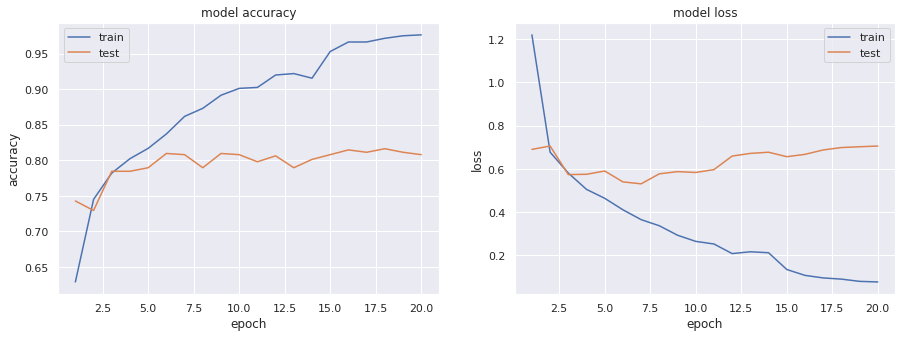

In [23]:
epochs = 20
vgg19_history = model.fit(train_images,train_labels, batch_size=64, epochs=epochs,callbacks=callbacks,validation_split=0.1)

make_plots(vgg19_history,epochs)

# ResNet50

In [24]:
from keras.applications import ResNet50
from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau

resnet = ResNet50(weights='imagenet', include_top=False, input_shape = (224, 224, 3),pooling='avg')
resnet.trainable = False

model = Sequential([
  resnet, 
  Dense(1024, activation='relu'),
  Dropout(0.5),
  Dense(256, activation='relu'),
  Dense(4, activation='softmax'),
])

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',factor=0.1,patience=2,cooldown=2,min_lr=0.00001,verbose=1)

callbacks = [reduce_learning_rate]

model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

94658560/94653016 [==============================] - 3s 0us/step


Train on 5384 samples, validate on 599 samples
Epoch 1/20
5384/5384 [==============================] - 44s 8ms/step - loss: 0.8845 - accuracy: 0.6805 - val_loss: 0.6075 - val_accuracy: 0.7763
Epoch 2/20
5384/5384 [==============================] - 40s 7ms/step - loss: 0.6062 - accuracy: 0.7725 - val_loss: 0.6236 - val_accuracy: 0.7579
Epoch 3/20
5384/5384 [==============================] - 40s 7ms/step - loss: 0.5302 - accuracy: 0.8022 - val_loss: 0.5823 - val_accuracy: 0.7746
Epoch 4/20
5384/5384 [==============================] - 40s 7ms/step - loss: 0.4807 - accuracy: 0.8172 - val_loss: 0.5975 - val_accuracy: 0.7880
Epoch 5/20
5384/5384 [==============================] - 40s 7ms/step - loss: 0.4712 - accuracy: 0.8247 - val_loss: 0.7076 - val_accuracy: 0.7563
Epoch 6/20
5384/5384 [==============================] - 40s 8ms/step - loss: 0.4254 - accuracy: 0.8475 - val_loss: 0.6199 - val_accuracy: 0.7830
Epoch 7/20
5384/5384 [==============================] - 40s 8ms/step - loss: 0.3832

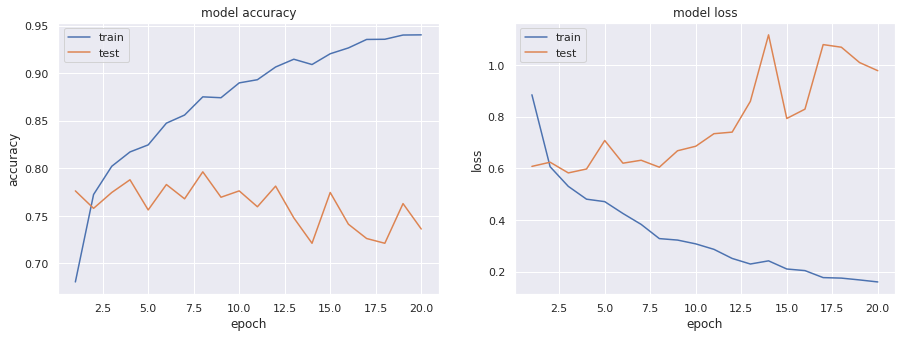

In [25]:
epochs = 20
resnet_history = model.fit(train_images,train_labels, batch_size=64, epochs=epochs,callbacks=callbacks,validation_split=0.1)

make_plots(resnet_history,epochs)

# Mobile Net

In [26]:
from keras.applications import MobileNetV2
from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau

mobile = MobileNetV2(weights='imagenet', include_top=False, input_shape = (224, 224, 3),pooling='avg')
mobile.trainable = False

model = Sequential([
  mobile, 
  Dense(1024, activation='relu'),
  Dropout(0.5),
  Dense(256, activation='relu'),
  Dense(4, activation='softmax'),
])

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',factor=0.1,patience=2,cooldown=2,min_lr=0.00001,verbose=1)

callbacks = [reduce_learning_rate]

model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

9412608/9406464 [==============================] - 1s 0us/step


Train on 5384 samples, validate on 599 samples
Epoch 1/20
5384/5384 [==============================] - 23s 4ms/step - loss: 1.0015 - accuracy: 0.5977 - val_loss: 1.5793 - val_accuracy: 0.2721
Epoch 2/20
5384/5384 [==============================] - 20s 4ms/step - loss: 0.7695 - accuracy: 0.7047 - val_loss: 1.2721 - val_accuracy: 0.4007
Epoch 3/20
5384/5384 [==============================] - 20s 4ms/step - loss: 0.7011 - accuracy: 0.7309 - val_loss: 1.3380 - val_accuracy: 0.3856
Epoch 4/20
5384/5384 [==============================] - 20s 4ms/step - loss: 0.6476 - accuracy: 0.7554 - val_loss: 1.3546 - val_accuracy: 0.3072
Epoch 5/20
5384/5384 [==============================] - 20s 4ms/step - loss: 0.5996 - accuracy: 0.7719 - val_loss: 1.2705 - val_accuracy: 0.4324
Epoch 6/20
5384/5384 [==============================] - 20s 4ms/step - loss: 0.5623 - accuracy: 0.7845 - val_loss: 1.3918 - val_accuracy: 0.4424
Epoch 7/20
5384/5384 [==============================] - 20s 4ms/step - loss: 0.5257

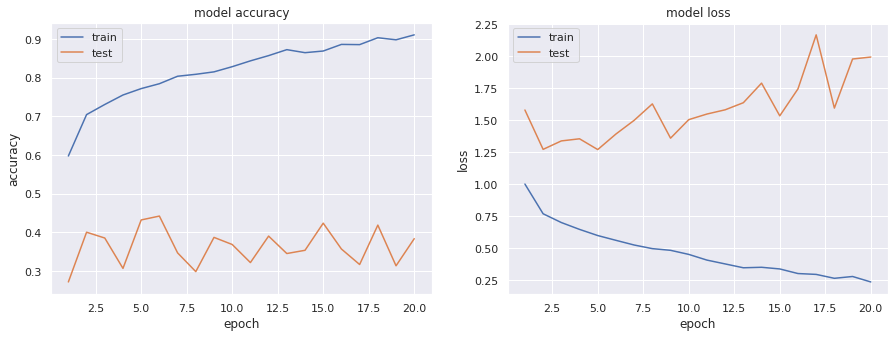

In [27]:
epochs = 20
mobile_history = model.fit(train_images,train_labels, batch_size=64, epochs=epochs,callbacks=callbacks,validation_split=0.1)

make_plots(mobile_history,epochs)